# Questão 2

In [7]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

## A)

In [8]:
df_a = pd.read_csv("resultados/resultado_questao_a.csv")

In [9]:
df_a = df_a[df_a["ValorMaximo"] == 940000]
df_a = df_a.sort_values(by=["TamanhoDaEntrada", "Algoritmo"])

resultados = []
for algoritmo in df_a["Algoritmo"].unique():
    dados_alg = df_a[df_a["Algoritmo"] == algoritmo]
    
    tempo_9M = dados_alg[dados_alg["TamanhoDaEntrada"] == 9400000]["TempoDeOrdenacao"].values
    tempo_94M = dados_alg[dados_alg["TamanhoDaEntrada"] == 94000000]["TempoDeOrdenacao"].values

    if len(tempo_9M) == 0 or len(tempo_94M) == 0:
        continue 

    intervalo_9M = (
        dados_alg[dados_alg["TamanhoDaEntrada"] == 9400000]["IntervaloInferior"].values[0],
        dados_alg[dados_alg["TamanhoDaEntrada"] == 9400000]["IntervaloSuperior"].values[0]
    )
    intervalo_94M = (
        dados_alg[dados_alg["TamanhoDaEntrada"] == 94000000]["IntervaloInferior"].values[0],
        dados_alg[dados_alg["TamanhoDaEntrada"] == 94000000]["IntervaloSuperior"].values[0]
    )

    resultados.append([algoritmo, tempo_9M[0], intervalo_9M, tempo_94M[0], intervalo_94M])

df_a_resultados = pd.DataFrame(resultados, columns=[
    "Algoritmo", "Tempo_9M", "Intervalo_9M", "Tempo_94M", "Intervalo_94M"
])

# Arredonda os valores no DataFrame principal
df_a_resultados["Tempo_9M"] = df_a_resultados["Tempo_9M"].round(2)
df_a_resultados["Tempo_94M"] = df_a_resultados["Tempo_94M"].round(2)
df_a_resultados["Intervalo_9M"] = df_a_resultados["Intervalo_9M"].apply(lambda x: (round(x[0], 2), round(x[1], 2)))
df_a_resultados["Intervalo_94M"] = df_a_resultados["Intervalo_94M"].apply(lambda x: (round(x[0], 2), round(x[1], 2)))

melhor_algoritmo = df_a_resultados.loc[df_a_resultados["Tempo_94M"].idxmin()]
pior_algoritmo = df_a_resultados.loc[df_a_resultados["Tempo_94M"].idxmax()]

print("\n Comparação do aumento de tempo:")
print(df_a_resultados)

print("\n Melhor algoritmo para 94M de entradas:")
print(melhor_algoritmo)

print("\n Pior algoritmo para 94M de entradas:")
print(pior_algoritmo)



 Comparação do aumento de tempo:
  Algoritmo  Tempo_9M          Intervalo_9M  Tempo_94M           Intervalo_94M
0  counting   2105.00      (1922.5, 2287.5)   18850.67    (16257.84, 21443.49)
1     merge  13132.33  (12982.91, 13281.76)  135320.00  (134853.43, 135786.57)
2     quick   9661.67    (9570.15, 9753.18)  158384.67  (153016.42, 163752.91)

 Melhor algoritmo para 94M de entradas:
Algoritmo                    counting
Tempo_9M                       2105.0
Intervalo_9M         (1922.5, 2287.5)
Tempo_94M                    18850.67
Intervalo_94M    (16257.84, 21443.49)
Name: 0, dtype: object

 Pior algoritmo para 94M de entradas:
Algoritmo                         quick
Tempo_9M                        9661.67
Intervalo_9M         (9570.15, 9753.18)
Tempo_94M                     158384.67
Intervalo_94M    (153016.42, 163752.91)
Name: 2, dtype: object


Com a entrada de 9,4 milhões, é possível notar que counting sort é superior que os demais, possuindo melhor tempo e intervalo de confiança, enquanto merge sort é o pior em ambos aspectos. 

Entretanto, ao aumentar o valor de entrada para 94 milhões, vemos que counting sort se mantém com menor tempo e intervalo de confiança, mas, merge sort demonstra um desempenho melhor que o anterior, possuindo um tempo e intervalo melhor que o do quick sort, além disso, acaba também possuindo o menor crescimento em comparação com os demais.

O gráfico a seguir demonstra visualmente o que foi relatado:

### Gráfico 1

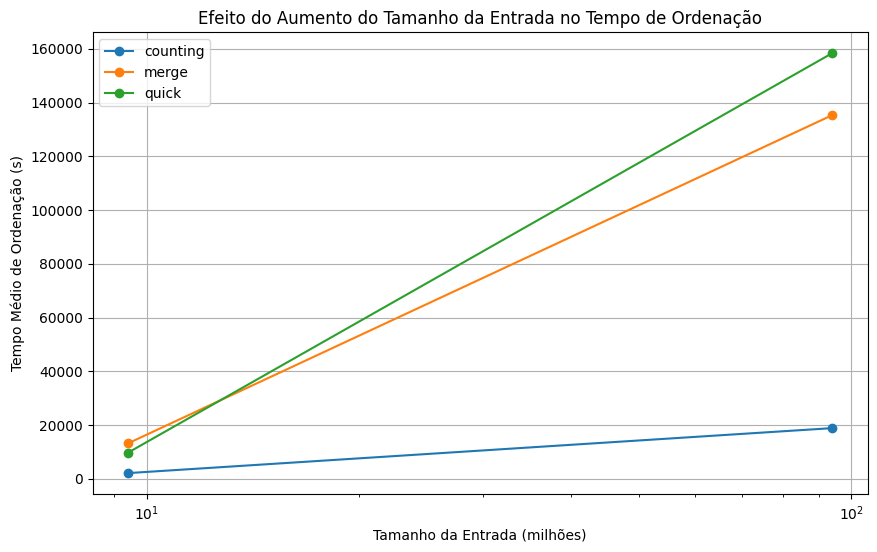

In [10]:
plt.figure(figsize=(10, 6))

for algoritmo in df_a_resultados["Algoritmo"].unique():
    subset = df_a_resultados[df_a_resultados["Algoritmo"] == algoritmo]
    plt.plot([9.4, 94], [subset["Tempo_9M"].values[0], subset["Tempo_94M"].values[0]], marker="o", label=algoritmo)

plt.xscale("log")
plt.xlabel("Tamanho da Entrada (milhões)")
plt.ylabel("Tempo Médio de Ordenação (s)")

plt.title("Efeito do Aumento do Tamanho da Entrada no Tempo de Ordenação")
plt.legend()
plt.grid(True)

nome_arquivo = os.path.join('graficos', 'grafico-1.jpg')
plt.savefig(nome_arquivo, format='jpg', dpi=300, bbox_inches='tight')

plt.show()

## B)

In [11]:
df = pd.read_csv("resultados/resultado_questao_b.csv")
df_filtered = df[df["TamanhoDaEntrada"] == 9400000]

# Analisar o aumento do tempo de ordenação
resultados = df_filtered.groupby(["Algoritmo", "ValorMaximo"]).agg(
    TempoMedio=("TempoDeOrdenacao", "mean"),
    IntervaloInferior=("IntervaloInferior", "mean"),
    IntervaloSuperior=("IntervaloSuperior", "mean"),
    ErroPadrao=("ErroPadrao", "mean")
).reset_index()

# Calcular a margem de erro (%)
resultados["MargemErro"] = (resultados["ErroPadrao"] / resultados["TempoMedio"]) * 100

# Verificar se atende ao critério de margem de erro <= 2%
resultados["AmostraSuficiente"] = resultados["MargemErro"] <= 2

# Identificar o melhor e o pior algoritmo em cada cenário
melhor_940k = resultados[resultados["ValorMaximo"] == 940000].nsmallest(1, "TempoMedio")
pior_940k = resultados[resultados["ValorMaximo"] == 940000].nlargest(1, "TempoMedio")
melhor_94M = resultados[resultados["ValorMaximo"] == 94000000].nsmallest(1, "TempoMedio")
pior_94M = resultados[resultados["ValorMaximo"] == 94000000].nlargest(1, "TempoMedio")

resultados["TempoMedio"] = resultados["TempoMedio"].round(2)
resultados["MargemErro"] = resultados["MargemErro"].round(2)

print("Para Valor Máximo 940000:")
print(f"Melhor Algoritmo: {melhor_940k.iloc[0]['Algoritmo']} (Tempo Médio: {melhor_940k.iloc[0]['TempoMedio']:.2f}s)")
print(f"Pior Algoritmo: {pior_940k.iloc[0]['Algoritmo']} (Tempo Médio: {pior_940k.iloc[0]['TempoMedio']:.2f}s)")
print("-" * 50)
print("Para Valor Máximo 94000000:")
print(f"Melhor Algoritmo: {melhor_94M.iloc[0]['Algoritmo']} (Tempo Médio: {melhor_94M.iloc[0]['TempoMedio']:.2f}s)")
print(f"Pior Algoritmo: {pior_94M.iloc[0]['Algoritmo']} (Tempo Médio: {pior_94M.iloc[0]['TempoMedio']:.2f}s)")
print("-" * 50)

print("Verificação da margem de erro:")
print(resultados[["Algoritmo", "ValorMaximo", "TempoMedio", "MargemErro"]])

Para Valor Máximo 940000:
Melhor Algoritmo: counting (Tempo Médio: 1910.33s)
Pior Algoritmo: merge (Tempo Médio: 16342.00s)
--------------------------------------------------
Para Valor Máximo 94000000:
Melhor Algoritmo: counting (Tempo Médio: 4159.33s)
Pior Algoritmo: merge (Tempo Médio: 13576.00s)
--------------------------------------------------
Verificação da margem de erro:
  Algoritmo  ValorMaximo  TempoMedio  MargemErro
0  counting       940000     1910.33       24.57
1  counting     94000000     4159.33        3.45
2     merge       940000    16342.00        2.92
3     merge     94000000    13576.00        0.10
4     quick       940000    12917.67        2.47
5     quick     94000000    10127.00        0.27


Para quantidade de valores menores é observado que counting sort é o melhor algoritmo, enquanto merge sort acaba sendo o pior. Entretanto, quando se trata de valores maiores, o algoritmo de quick sort possuí um desempenho melhor, enquanto counting sort é o pior para esses cenário.

Abaixo temos uma representação visual para melhor entender:

### Gráfico 2

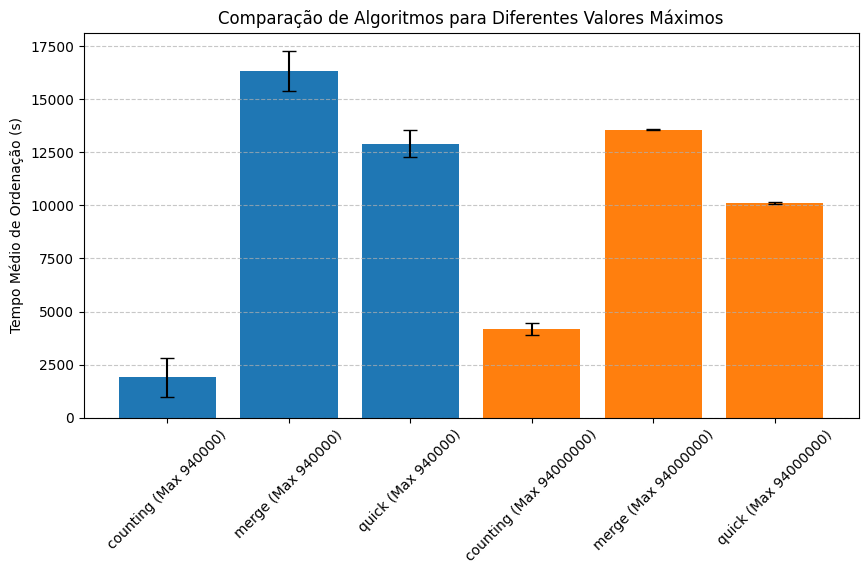

In [12]:
plt.figure(figsize=(10, 5))
for max_val in resultados["ValorMaximo"].unique():
    df_plot = resultados[resultados["ValorMaximo"] == max_val]
    plt.bar(df_plot["Algoritmo"] + f" (Max {max_val})", df_plot["TempoMedio"], yerr=df_plot["TempoMedio"] - df_plot["IntervaloInferior"], capsize=5)

plt.ylabel("Tempo Médio de Ordenação (s)")
plt.title("Comparação de Algoritmos para Diferentes Valores Máximos")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

nome_arquivo = os.path.join('graficos', 'grafico-2.jpg')
plt.savefig(nome_arquivo, format='jpg', dpi=300, bbox_inches='tight')

plt.show()

É interessante observar que o algoritmo merge sort não teve muita diferença em seu tempo de ordenação, independente do valor de entrada, demonstrado uma maior estabilidade nesses aspecto que os demais.